<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

In [1]:
#Libs
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

## Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

Tamaño de la imagen: (563, 920, 3)


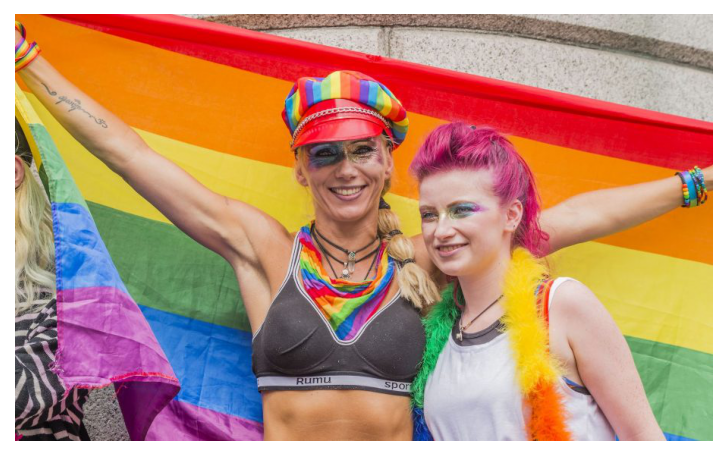

In [2]:
path    = 'https://img.ti-media.net/wp/uploads/sites/46/2018/06/pride-month-920x563.jpg'
formato = 'jpg'

# Cargamos el archivo

if in_colab:
    try:
        getoutput("wget "+path+" -O Imagen")
        path = data_dir = os.path.join(os.getcwd(), 'Imagen')
    except:
        print('No se pudo descargar la imagen.')


img = mpimg.imread(path, format=formato)

# Definimos RGB y RGB normalizado
if img.ravel().dtype == float: RGB = (img*255).astype('uint8')
else                         : RGB = img.copy() ; img = RGB/255
print('Tamaño de la imagen:', img.shape)

# Ploteo
plt.figure(dpi=150)
plt.axis('off')
plt.imshow(img)
plt.show()

## Procesamiento

### Transformación de imagen en RGB al espacio YIQ

In [3]:
YIQ = RGBtoYIQ(RGB, verb=True) #Pasamos a YIQ

Se ha transformado de RGB a YIQ


### Modificación de imagen en espacio YIQ

Se modifica la imagen según los parámetros:
- alpha
- beta

In [4]:
alpha = 1.2
beta  = 0.4

YIQ_m = ModifyYIQ(YIQ, verb=True, alpha=alpha, beta=beta) #Modificamos a YIQ

Se ha multiplicado: Y * 1.2 ; I * 0.4 ; Q * 0.4


### Transformación de imagen en YIQ al espacio RGB

In [5]:
img_m = YIQtoRGB(YIQ_m, normed=True, verb=True) #Volvemos a RGB y normalizamos
RGB_m = (img_m*255.).astype('uint8')

Se ha transformado de YIQ a RGB


### Ploteo de comparación de imágenes

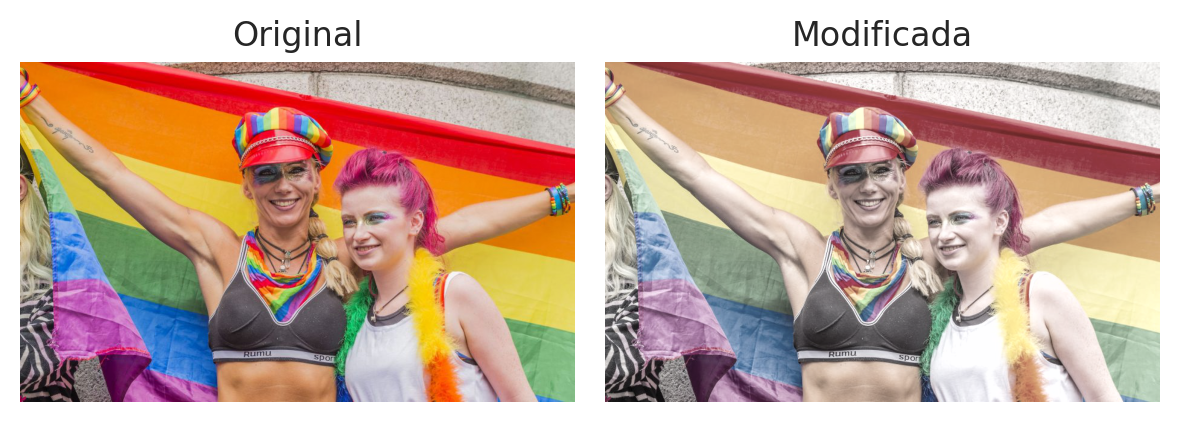

In [6]:
#Ploteamos
plt.figure(dpi=200)
plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Modificada')
plt.axis('off')
plt.imshow(img_m)
plt.tight_layout()
plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [7]:
if not in_colab:
    name     = 'Img_Procesada'
    formato  = 'jpg'

    IMG = Image.fromarray(RGB_m)
    IMG.save(name+'.'+formato)